In [224]:
import pandas as pd 
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [225]:
df=pd.read_csv('D:\data\winequality_red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [226]:
data=pd.DataFrame(data=df)

In [227]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [228]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [230]:
data.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [231]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

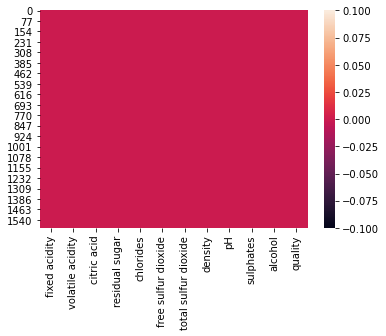

In [232]:
sns.heatmap(data.isnull())

In [233]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [234]:
data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [235]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [236]:
df.shape

(1599, 12)

fixed acidity              AxesSubplot(0.125,0.536818;0.110714x0.343182)
volatile acidity        AxesSubplot(0.257857,0.536818;0.110714x0.343182)
citric acid             AxesSubplot(0.390714,0.536818;0.110714x0.343182)
residual sugar          AxesSubplot(0.523571,0.536818;0.110714x0.343182)
chlorides               AxesSubplot(0.656429,0.536818;0.110714x0.343182)
free sulfur dioxide     AxesSubplot(0.789286,0.536818;0.110714x0.343182)
total sulfur dioxide          AxesSubplot(0.125,0.125;0.110714x0.343182)
density                    AxesSubplot(0.257857,0.125;0.110714x0.343182)
pH                         AxesSubplot(0.390714,0.125;0.110714x0.343182)
sulphates                  AxesSubplot(0.523571,0.125;0.110714x0.343182)
alcohol                    AxesSubplot(0.656429,0.125;0.110714x0.343182)
quality                    AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

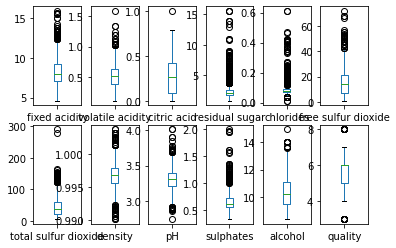

In [237]:
data.plot(kind='box',subplots=True,layout=(2,6))

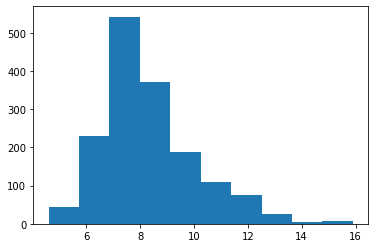

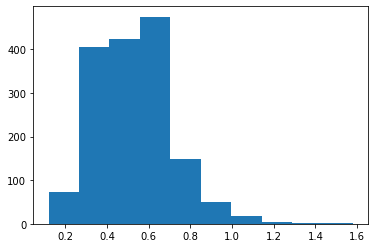

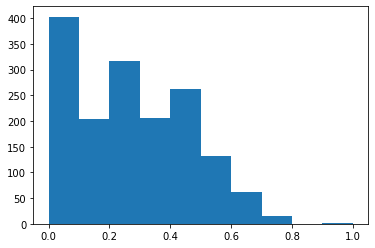

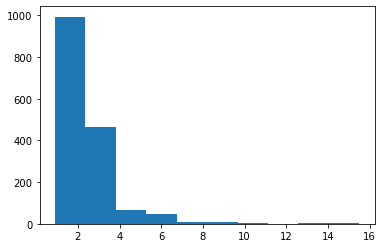

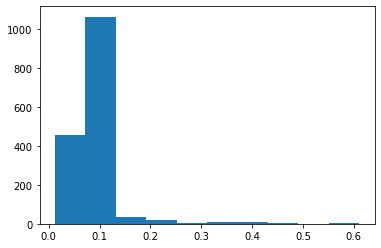

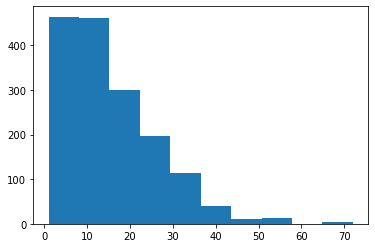

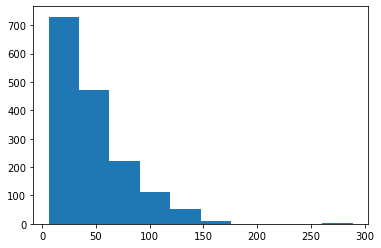

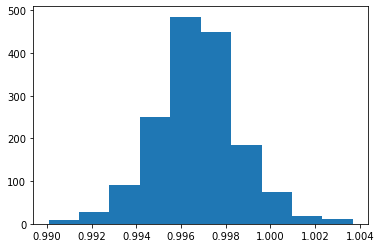

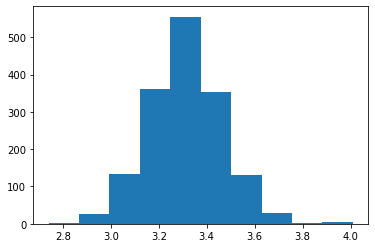

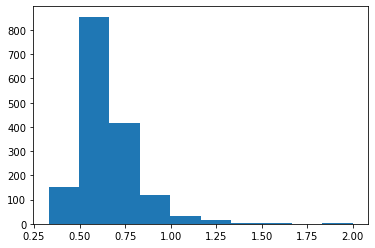

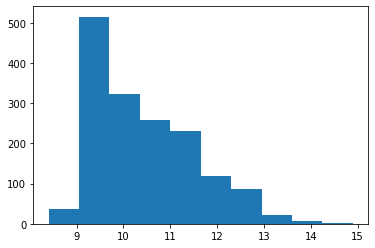

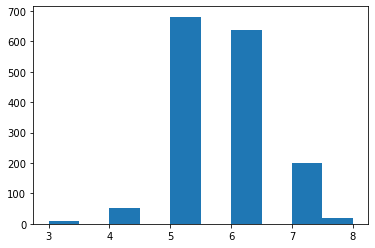

In [238]:
for i in data.columns:
    plt.figure()
    plt.hist(data[i])

In [239]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


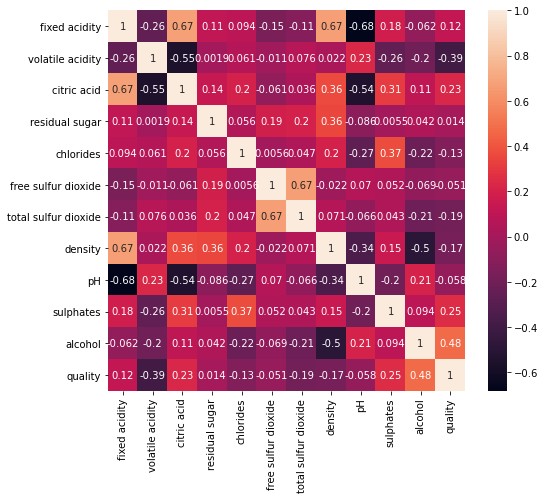

In [240]:
cor_heat=data.corr()
plt.figure(figsize=(8,7))
sns.heatmap(cor_heat,annot=True)
plt.show()

In [241]:
# sns.pairplot(data)

In [242]:
from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [243]:
thresold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [244]:
dn=data[(z<3).all(axis=1)]
dn

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [245]:
dn.shape

(1451, 12)

In [246]:
data.shape

(1599, 12)

In [247]:
x=data.iloc[:,0:-1]

In [248]:
y=data.iloc[:,-1]

In [249]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [250]:
data=pd.DataFrame(data=data)
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [251]:
x.shape

(1599, 11)

In [252]:
y.shape

(1599,)

In [253]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=42)

In [254]:
x_train.shape

(1247, 11)

In [255]:
x_test.shape

(352, 11)

In [256]:
y_train.shape

(1247,)

In [257]:
y_test.shape

(352,)

In [258]:
lm=LinearRegression()

In [259]:
lm.fit(x_train,y_train)

LinearRegression()

In [260]:
pred=lm.predict(x_test)

In [261]:
lm.score(x_train,y_train)

0.3496978002133466

In [262]:
lm.coef_

array([ 0.04003071, -0.17919649, -0.02475522,  0.01238764, -0.0846082 ,
        0.06430653, -0.12508856, -0.0273117 , -0.05786935,  0.14073543,
        0.30049345])

In [263]:
lm.intercept_

5.63073566076432

In [264]:
print('errors:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

errors:
Mean absolute error: 0.49982735811517265
Mean squared error: 0.3871763662959636
Root mean squared error: 0.6222349767539298


In [265]:
print(r2_score(y_test,pred))

0.3925660898306438


In [266]:
cross_val_score=cross_val_score(lm,x,y,cv=5,scoring='r2')

In [267]:
print(cross_val_score)

[0.13200871 0.31858135 0.34955348 0.369145   0.2809196 ]


In [268]:
print(cross_val_score.mean())

0.2900416288421964


In [269]:
from sklearn.ensemble import RandomForestRegressor             #Random forest tree

In [270]:
rf=RandomForestRegressor(n_estimators=100,random_state=42)

In [271]:
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [272]:
predrf=rf.predict(x_test)

In [273]:
rf.score(x_train,y_train)

0.9267647123848194

In [274]:
print('errors:')
print('Mean absolute error:',mean_absolute_error(y_test,predrf))
print('Mean squared error:',mean_squared_error(y_test,predrf))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predrf)))

errors:
Mean absolute error: 0.4258806818181817
Mean squared error: 0.30737130681818176
Root mean squared error: 0.5544107744427247


In [281]:
print(r2_score(y_test,predrf))

0.5177707860615884


In [276]:
from sklearn.svm import SVR                       #Support Vector Regressor

In [277]:
kernellist=['linear','poly','rbf'];

In [278]:
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.3383744605382907
0.4640472701272218
0.5285472825193872


In [282]:
import joblib

In [284]:
joblib.dump(rf,'wine_dataset.pkl')

['wine_dataset.pkl']